In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 


image 1/1 /content/cats-and-dogs.jpg: 512x640 1 cat, 1 dog, 3029.4ms
Speed: 9.2ms preprocess, 3029.4ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 640)
Image: /content/cats-and-dogs.jpg
Detections:
 - Class: dog, Confidence: 0.94, Box: [48.361083984375, 38.13148880004883, 377.8538513183594, 427.9195556640625]
 - Class: cat, Confidence: 0.92, Box: [327.0793762207031, 28.440324783325195, 556.9793090820312, 397.5581970214844]


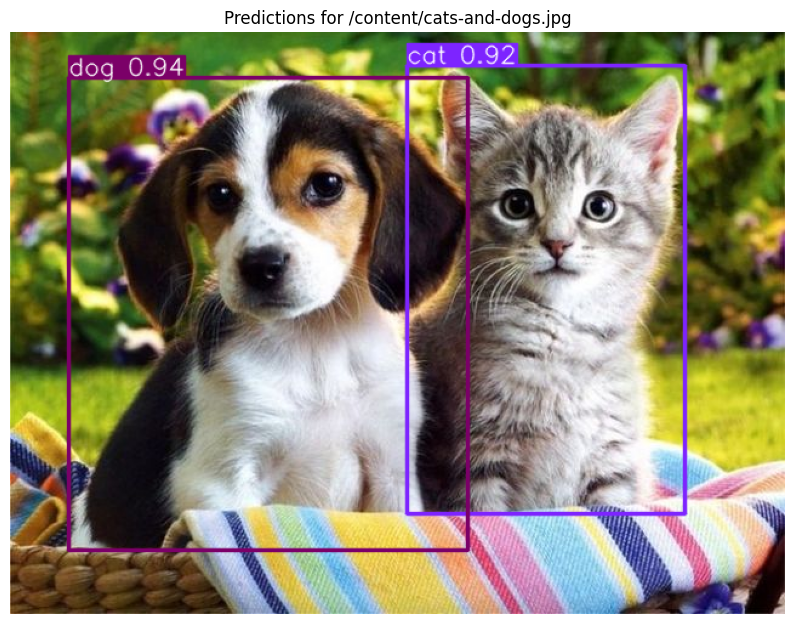

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load trained model
model = YOLO("yolo11x.pt")

# Run inference on test images
results = model.predict(
    imgsz=640,
    source="/content/cats-and-dogs.jpg",  # Update path
    conf=0.25
)

# Print and visualize results
for result in results:
    print(f"Image: {result.path}")
    print("Detections:")
    for box in result.boxes:
        label = result.names[int(box.cls)]
        conf = box.conf.item()
        xyxy = box.xyxy[0].tolist()
        print(f" - Class: {label}, Confidence: {conf:.2f}, Box: {xyxy}")

    # Visualize
    img = result.plot()  # Annotated image
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(f"Predictions for {result.path}")
    plt.show()